# Hose Price Predictions

Your model should learn from this data and be able to predict the median housing
price in any district, given all the other metrics.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [146]:
# Load the Data and reorder the index

housing=pd.read_csv("data/housing.csv",
                    )


housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Exploration

Attributes-> longitude, latitude, housing_median_age, total_rooms, total_bed
rooms, population, households, median_income, median_house_value, and
ocean_proximity.

In [85]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

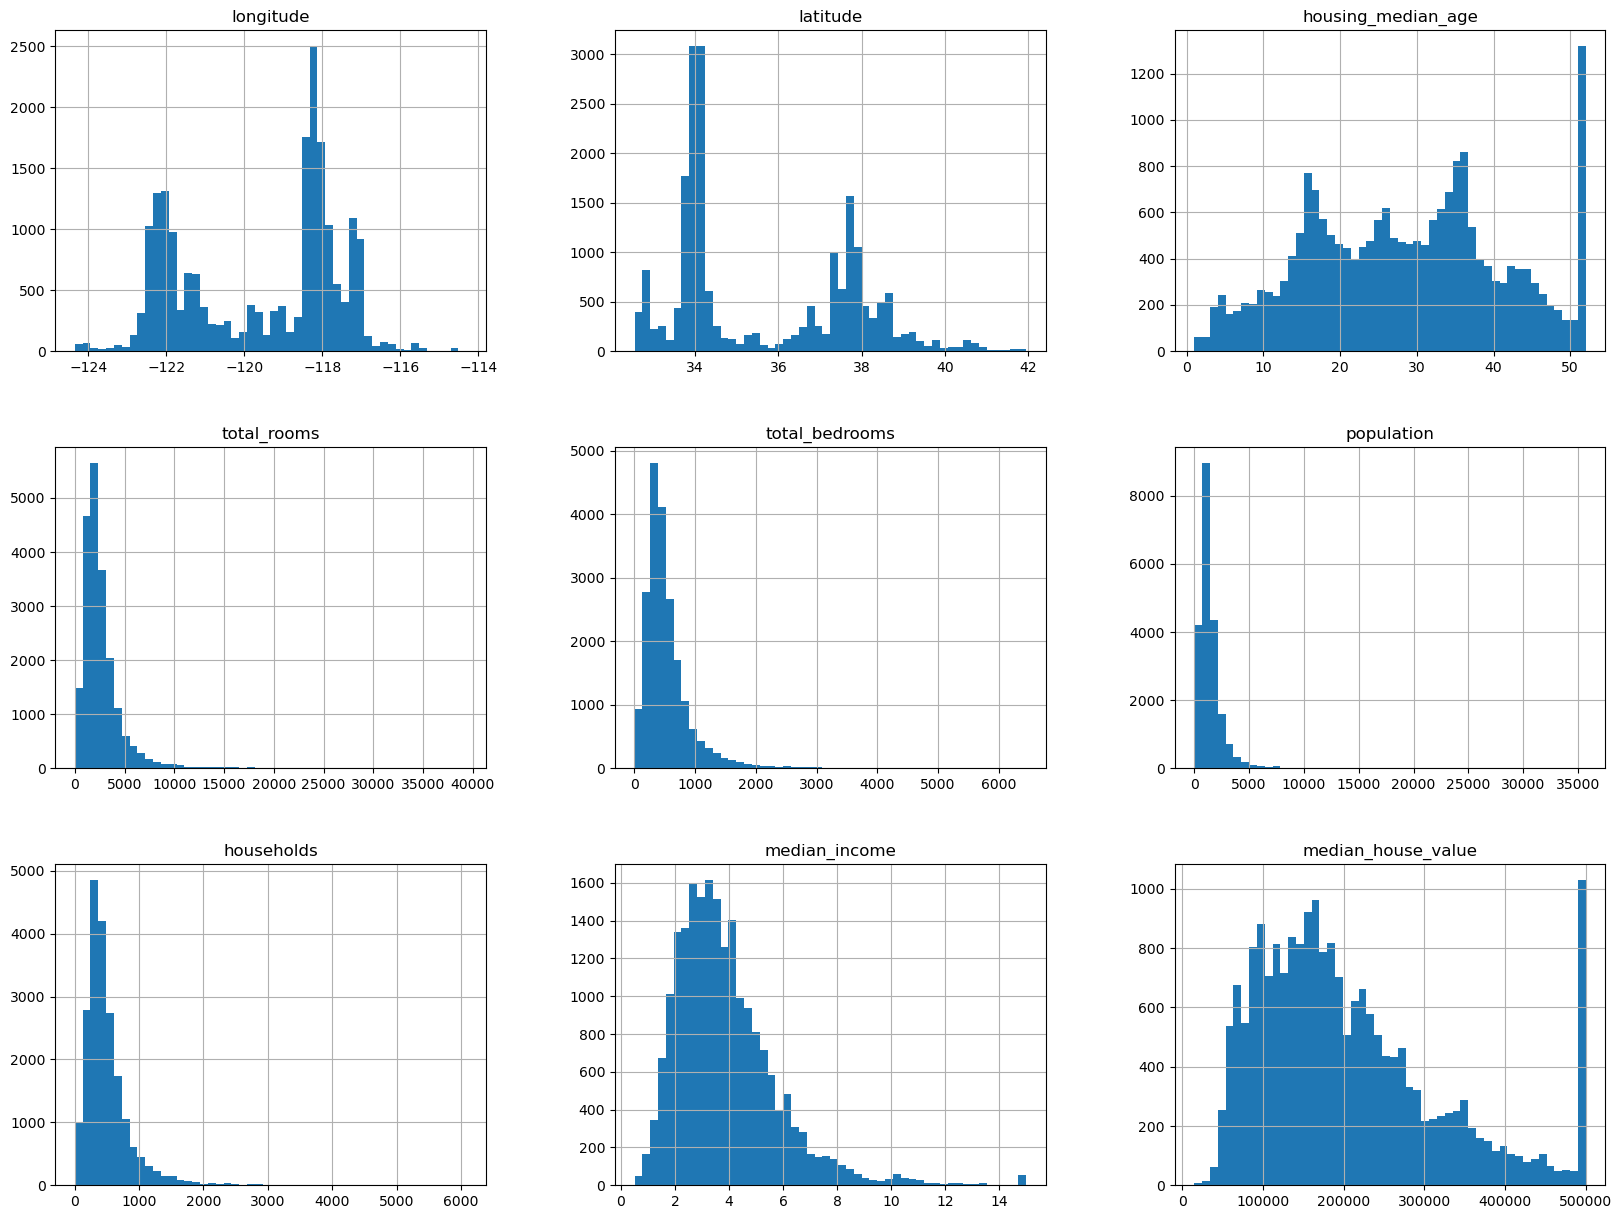

In [87]:
housing.hist(bins=50,figsize=(20,15))

In [88]:
# statistical summary of the DataFrame

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

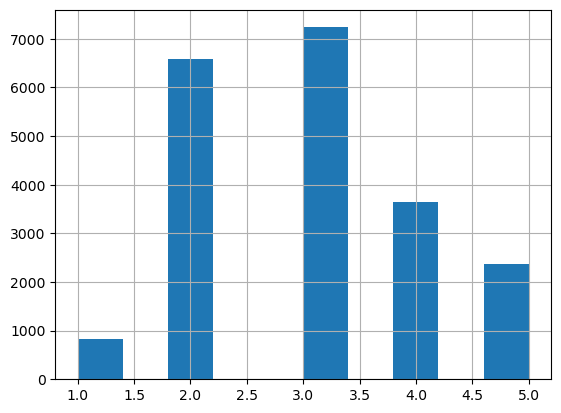

In [89]:
# Add an income category attribute

housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

housing["income_cat"].hist()

### Now you are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn’s StratifiedShuffleSplit class:

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

train_set,test_set=next(split.split(housing,housing["income_cat"]))

strat_train=housing.loc[train_set]
strat_test=housing.loc[test_set]


strat_test["income_cat"].value_counts()/len(strat_test)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [98]:
# now we should remove the income_cat attribute so the data is back to its original state

for set_ in (strat_train,strat_test):
    set_.drop("income_cat",axis=1,inplace=True)

# Discover and Visualize the Data to Gain Insights


In [66]:
def Evalute_Model(y_test,y_pred):
    print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE:',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Evalute_Model(y_test,y_pred)


MAE: 1.9574996602301502
MSE: 6.560527271813469
RMSE: 2.561352625433185


## Discover and Visualize the Data to Gain Insights

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


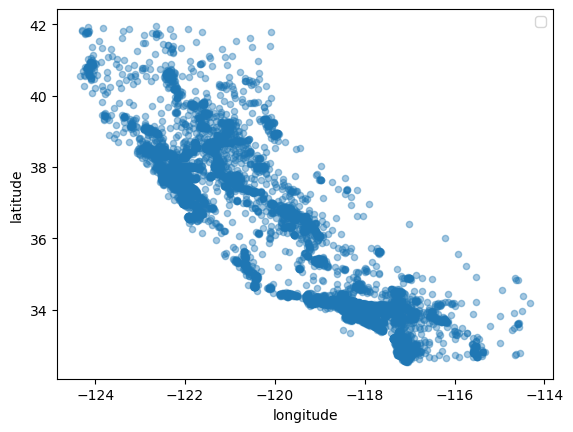

In [103]:

# Prepare the Data for Machine Learning Algorithms

housing=strat_train.copy()

housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,)
plt.legend()



<Figure size 1000x700 with 0 Axes>

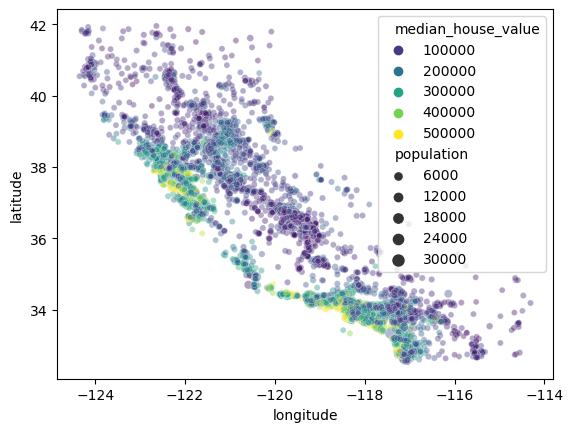

<Figure size 1000x700 with 0 Axes>

In [120]:

sns.scatterplot(x="longitude",y="latitude",data=housing,hue="median_house_value",alpha=0.4,
palette="viridis",size="population",)
plt.figure(figsize=(10,7))

<AxesSubplot:>

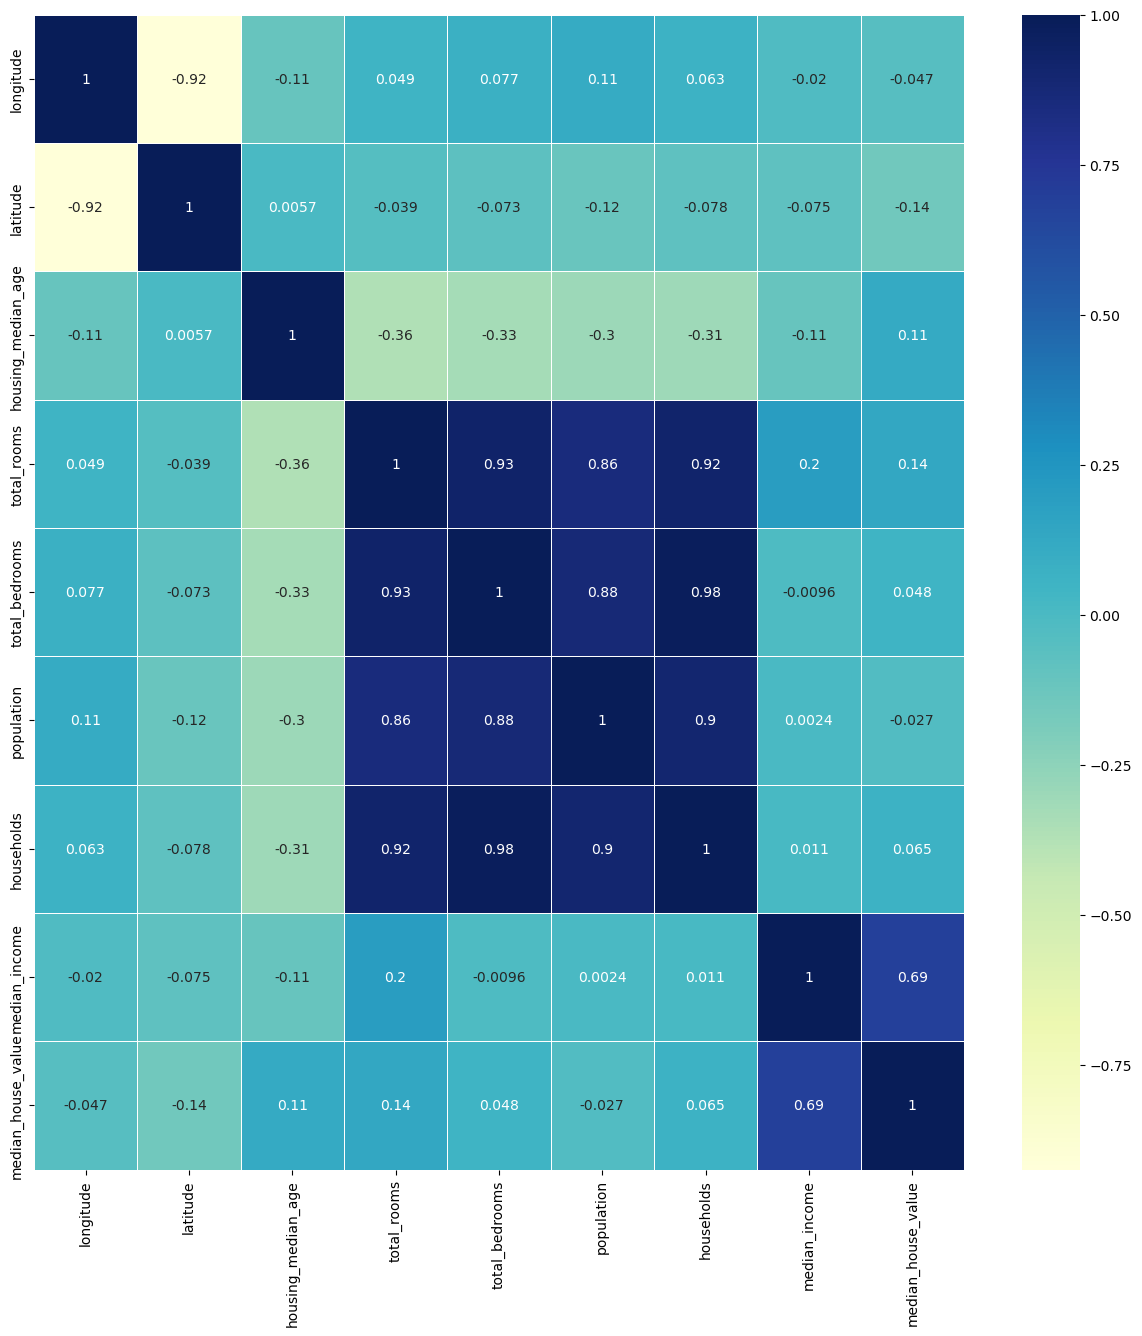

In [127]:
corr_matrix=housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',linewidths=.5,ax=ax)

 

For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at.

In [131]:

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [135]:
# now let's look at the correlation matrix again

corr_matrix=housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<AxesSubplot:>

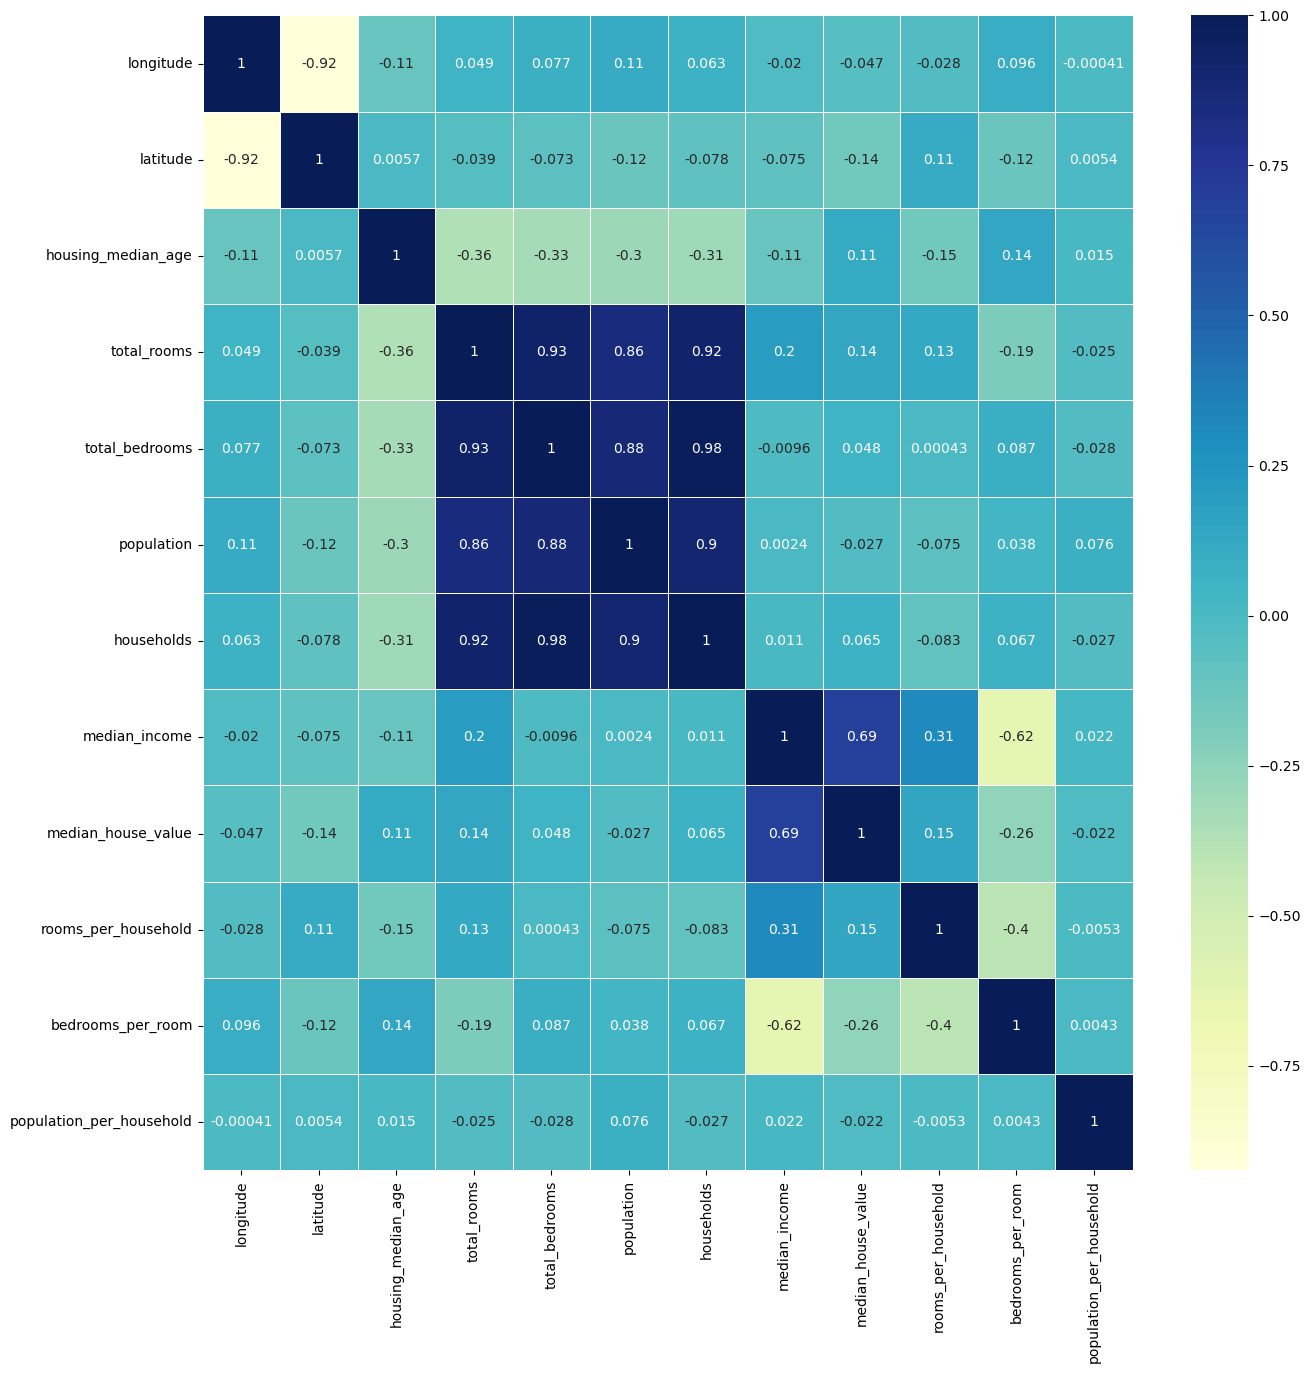

In [136]:
fig,ax=plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',linewidths=.5,ax=ax)



In [137]:
# first let’s revert to a clean training set (by copying strat_train_set once again),

housing=strat_train.drop("median_house_value",axis=1)

housing_labels=strat_train["median_house_value"].copy()

## Data Cleaning

You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:

* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.).

In [140]:
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

# Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity:

housing_num=housing.drop("ocean_proximity",axis=1)

# Now you can fit the imputer instance to the training data using the fit() method:

imputer.fit(housing_num)

housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [148]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

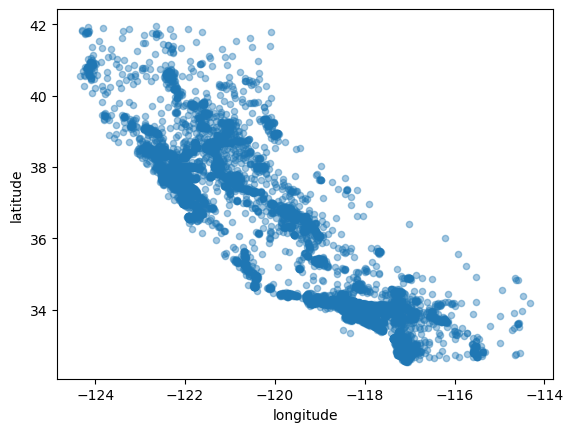

In [149]:
housing_tr.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,)